In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [11]:
digits = datasets.load_digits()

## Digits dataset

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., ‘png’ files), we would load them using matplotlib.pyplot.imread.

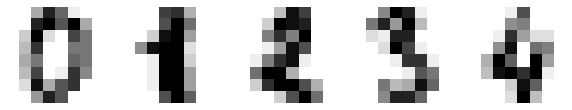

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
for image, label, ax in zip(digits.images, digits.target, axes):
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.binary)
    ax.axis('off')

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,).

We can then split the data into train and test subsets and fit a **support vector classifier** on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [22]:
# flatten the images
num_images = len(digits.images)
flattened_img = digits.images.reshape(num_images, -1)

In [23]:
print('Number of images ',num_images)
print('Shape of images', digits.images.shape)
print('Shape of flattened images', flattened_img.shape)

Number of images  1797
Shape of images (1797, 8, 8)
Shape of flattened images (1797, 64)


In [24]:
# Create a classifier: a support vector classifier
clf = SVC(gamma=0.001)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(flattened_img, digits.target, test_size=0.2, random_state=42)

In [27]:
print('Shape of training data',X_train.shape)
print('Shape of testing data',X_test.shape)
print('Shape of training label',X_train.shape)
print('Shape of testing label',X_test.shape)

Shape of training data (1437, 64)
Shape of testing data (360, 64)
Shape of training label (1437, 64)
Shape of testing label (360, 64)


In [29]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
preds = clf.predict(X_test)

In [31]:
# evaluation
score = clf.score(X_test, y_test)
print('Score', score)

Score 0.9888888888888889


Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



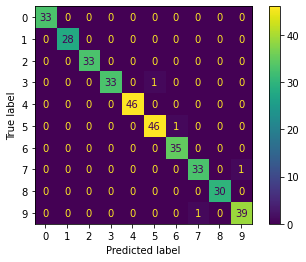

In [49]:
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

print('Classification Report \n\n',classification_report(y_test,preds))


plot_confusion_matrix(clf,X_test, y_test);

Visualize the predictions

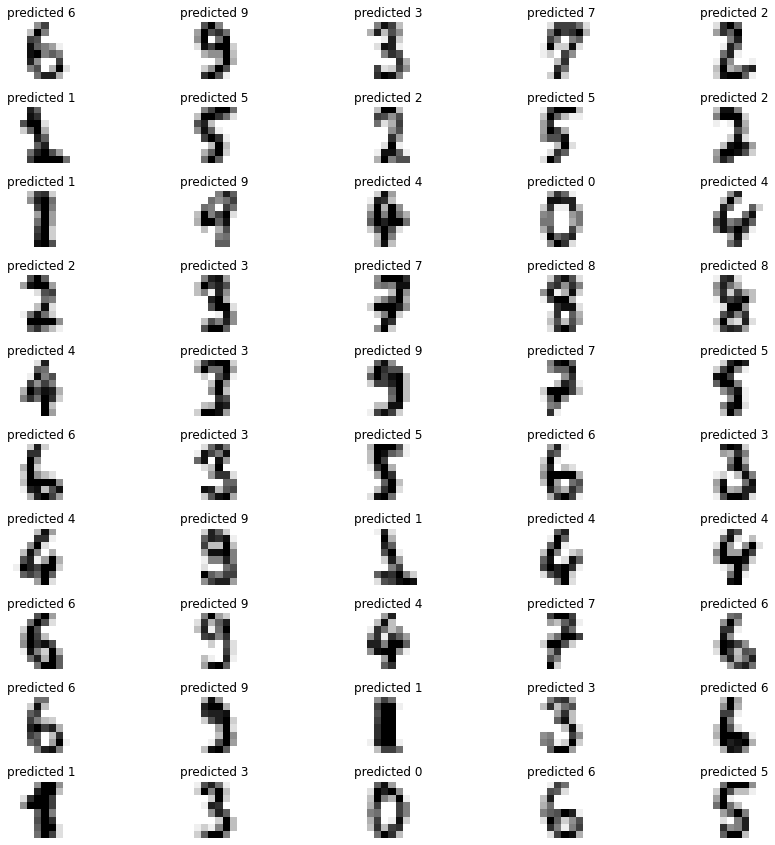

In [42]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), interpolation='nearest', cmap=plt.cm.binary)
    plt.axis('off')
    plt.title('predicted '+str(preds[i]))
    plt.subplots_adjust(hspace=0.5)
    